In [1]:
#Set local Path and import required libraries.

your_local_path= "D:/UpX Academy/Python_Project_Datasets/Projects/Final Project Datasets/attachment_Project_5_Facebook_data/"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Use read_csv to import the input data in the Dataframe and use Userid as index.
SourceData= pd.read_csv(your_local_path+"pseudo_facebook.tsv", sep='\t', header=0)

In [3]:
SourceData.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [4]:
SourceData.shape

(99003, 15)

In [5]:
#Convert the Date of birth in different columns to one for easier usage in later steps.

SourceData["DateOfBirth"] = SourceData["dob_day"].astype(str) + "-" + SourceData["dob_month"].astype(str) + "-" + SourceData["dob_year"].astype(str)
SourceData.drop(['dob_day','dob_month','dob_year'],axis=1, inplace=True)

In [6]:
SourceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 13 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
DateOfBirth              99003 non-null object
dtypes: float64(1), int64(10), object(2)
memory usage: 9.8+ MB


In [7]:
#Considering we want to focus only on the active members i.e. with friends, we will drop the rows with 0 friend_count.

SourceData.drop(SourceData[SourceData['friend_count'] == 0].index)

,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,DateOfBirth
1962,1295206,14,female,126.0,1,1,0,0,0,0,0,0,15-12-1999
1963,1549189,14,female,95.0,1,1,0,0,0,0,0,0,20-12-1999
1964,1102182,14,female,2.0,1,1,0,0,0,0,0,0,10-12-1999
1965,1433884,13,male,199.0,1,1,0,0,0,0,0,0,15-1-2000
1966,1995935,13,male,264.0,1,0,0,0,0,0,0,0,1-1-2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,female,541.0,2118,341,3996,18089,3505,11887,491,6202,4-4-1945
98999,1256153,18,female,21.0,1968,1720,4401,13412,4399,10592,2,2820,12-3-1995
99000,1195943,15,female,111.0,2002,1524,11959,12554,11959,11462,0,1092,10-5-1998
99001,1468023,23,female,416.0,2560,185,4506,6516,4506,5760,0,756,11-4-1990


In [8]:
#Let us use one of the functions nlargest to get top 100 users with most friends.

SourceData.nlargest(100,'friend_count')

,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,DateOfBirth
98159,2090699,103,female,783.0,4923,96,26,80,26,71,0,9,1-10-1910
98026,1660276,66,male,716.0,4917,431,0,114,0,69,0,45,1-7-1947
98184,1926655,19,female,469.0,4863,241,37,166,36,117,1,49,1-8-1994
98797,1685573,38,male,1930.0,4845,942,1768,4886,1208,1619,560,3267,20-2-1975
98087,1386477,61,male,1210.0,4844,561,7,247,5,96,2,151,30-3-1952
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98738,2118039,20,female,788.0,4540,2145,1169,482,1169,375,0,107,20-9-1993
98993,1654565,19,male,394.0,4538,4144,4501,15088,4435,5961,66,9127,15-8-1994
98533,1166881,18,female,695.0,4535,1916,492,983,322,511,170,472,18-1-1995
98912,1248163,15,female,484.0,4530,2097,2394,6536,2394,5044,0,1492,29-5-1998


In [9]:
#Getting our focus back on the Business Use Case, let's filter out only the top 5% users with highest number of friends.

Target = SourceData[SourceData.friend_count > SourceData.friend_count.quantile(.95)]

In [10]:
Target.shape

(4944, 13)

In [11]:
#Below we will compute the most number of friend request received. This will tell us how many people are more seeked after.

Target['friend_recieved'] = Target['friend_count'] - Target['friendships_initiated']

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
#If a user receives more than 500 friend requests, it is safe to assume that the user has quite a bit of fan following.

Famous_Target = Target[(Target['friend_recieved']>500)]

In [13]:
#Even so, more number of fan following doesn't mean they are producing quality content. Hence we will exclude the rows with 0 or 1 likes.

Famous_Target[(Famous_Target['likes']>1)]

,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,DateOfBirth,friend_recieved
94147,1431572,29,male,635.0,821,162,3,68,0,40,3,28,1-12-1984,659
94148,1295785,17,male,829.0,744,211,3,22,2,19,1,3,6-8-1996,533
94149,1580482,20,female,658.0,805,123,3,61,1,49,2,12,13-11-1993,682
94152,1827269,80,female,630.0,745,152,3,1,3,0,0,1,14-3-1933,593
94155,1478171,17,female,462.0,722,187,3,16,3,12,0,4,28-4-1996,535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98996,1668695,24,female,182.0,2938,1272,6018,17765,5843,11708,175,6057,25-4-1989,1666
98997,1458985,28,female,290.0,2218,1618,4626,10268,4290,4250,336,6018,14-12-1985,600
98998,1268299,68,female,541.0,2118,341,3996,18089,3505,11887,491,6202,4-4-1945,1777
99001,1468023,23,female,416.0,2560,185,4506,6516,4506,5760,0,756,11-4-1990,2375


In [14]:
#Below we calculate the total number of likes recieved from Mobile as well as Desktop platform.

Famous_Target["Total_likes_recieved"] = Famous_Target["mobile_likes_received"] + Famous_Target["www_likes_received"]

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
#To filter out the real influential people, we consider only those users that have more than twice the number of likes as they have the number of friends. 
#This will mean either they are widely shared or, have produced multiple pieces of content that are liked.

Final_Target = Famous_Target[(Famous_Target['Total_likes_recieved']> 2*Famous_Target['friend_count'])]

In [16]:
Final_Target

,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,DateOfBirth,friend_recieved,Total_likes_recieved
94685,1685286,39,female,1754.0,826,264,292,1818,181,856,111,962,7-9-1974,562,1818
94813,1364155,25,female,130.0,744,55,497,1698,497,1348,0,350,1-1-1988,689,1698
94844,1969298,37,female,654.0,739,147,646,1705,500,597,146,1108,21-5-1976,592,1705
94911,1432172,26,female,322.0,723,62,1058,2872,1058,1728,0,1144,2-3-1987,661,2872
94954,2074097,15,female,111.0,818,274,1570,2333,143,445,1427,1888,1-3-1998,544,2333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98996,1668695,24,female,182.0,2938,1272,6018,17765,5843,11708,175,6057,25-4-1989,1666,17765
98997,1458985,28,female,290.0,2218,1618,4626,10268,4290,4250,336,6018,14-12-1985,600,10268
98998,1268299,68,female,541.0,2118,341,3996,18089,3505,11887,491,6202,4-4-1945,1777,18089
99001,1468023,23,female,416.0,2560,185,4506,6516,4506,5760,0,756,11-4-1990,2375,6516


In [17]:
#Below next few blocks are further analysis of users which will help the management to decide on the graphical aspects of the marketing content.

labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','100-109','110-119']
Final_Target['age_group'] = pd.cut(Final_Target.age,range(0,123,10),right = True, labels=labels)

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


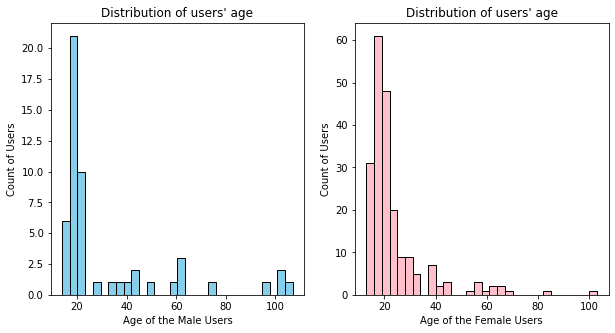

In [18]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace= 0.2, wspace= 0.2)
plt.subplot(1,2,1)
Final_Target.age[Final_Target.gender =='male'].plot.hist(bins=30, color = "skyblue", ec="black")
plt.title("Distribution of users' age")
plt.ylabel("Count of Users")
plt.xlabel("Age of the Male Users");

plt.subplot(1,2,2)
Final_Target.age[Final_Target.gender =='female'].plot.hist(bins=30, color = "pink", ec="black")
plt.title("Distribution of users' age")
plt.ylabel("Count of Users")
plt.xlabel("Age of the Female Users");

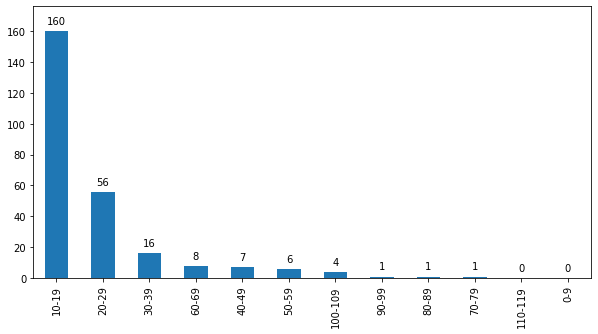

In [19]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace= 0.2, wspace= 0.2)
ax1 = Final_Target.age_group.value_counts().plot(kind='bar')
def autolabel(rects, ax1):
    for rect in rects:
        x = rect.get_x() + rect.get_width()/2.
        y = rect.get_height()
        ax1.annotate("{}".format(y), (x,y), xytext=(0,5), textcoords="offset points",
                    ha='center', va='bottom')

autolabel(ax1.patches,ax1)

ax1.margins(y=0.1)
plt.show()

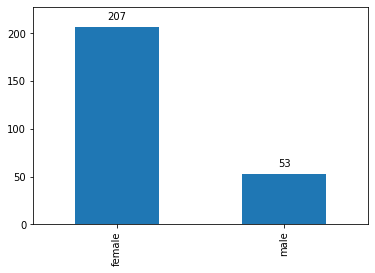

In [20]:
ax = Final_Target.gender.value_counts().plot(kind='bar')


def autolabel(rects, ax):
    for rect in rects:
        x = rect.get_x() + rect.get_width()/2.
        y = rect.get_height()
        ax.annotate("{}".format(y), (x,y), xytext=(0,5), textcoords="offset points",
                    ha='center', va='bottom')

autolabel(ax.patches,ax)

ax.margins(y=0.1)
plt.show()

In [46]:
Final_Target["Mode_preference"] = Final_Target["mobile_likes_received"] - Final_Target["www_likes_received"]

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
Mode_Pref = Final_Target[(Final_Target['Mode_preference']> 0)]

In [48]:
Mode_Pref

,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,DateOfBirth,friend_recieved,Total_likes_recieved,age_group,Mode_preference
94813,1364155,25,female,130.0,744,55,497,1698,497,1348,0,350,1-1-1988,689,1698,20-29,998
94911,1432172,26,female,322.0,723,62,1058,2872,1058,1728,0,1144,2-3-1987,661,2872,20-29,584
94982,2026591,13,female,130.0,817,290,2037,2484,1064,1890,973,594,4-3-2000,527,2484,10-19,1296
95022,1445913,28,female,51.0,773,170,3542,2366,3542,1959,0,407,6-6-1985,603,2366,20-29,1552
95034,1664534,17,female,164.0,734,46,6403,6146,6212,5174,191,972,4-10-1996,688,6146,10-19,4202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98995,1132164,20,female,699.0,3611,973,4507,7768,4414,6909,93,859,9-10-1993,2638,7768,10-19,6050
98996,1668695,24,female,182.0,2938,1272,6018,17765,5843,11708,175,6057,25-4-1989,1666,17765,20-29,5651
98998,1268299,68,female,541.0,2118,341,3996,18089,3505,11887,491,6202,4-4-1945,1777,18089,60-69,5685
99001,1468023,23,female,416.0,2560,185,4506,6516,4506,5760,0,756,11-4-1990,2375,6516,20-29,5004


In [42]:
Mode_Pref.Mode_preference = pd.to_numeric(Mode_Pref.Mode_preference, errors='coerce')

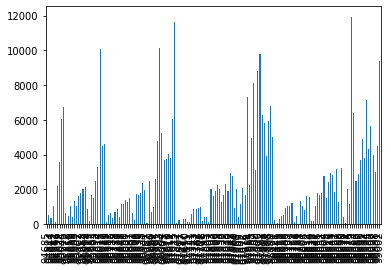

In [44]:
ax = Mode_Pref.Mode_preference.plot(kind='bar')

In [28]:
Final_Target

,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,DateOfBirth,friend_recieved,Total_likes_recieved,age_group,Mode_preference
94685,1685286,39,female,1754.0,826,264,292,1818,181,856,111,962,7-9-1974,562,1818,30-39,70
94813,1364155,25,female,130.0,744,55,497,1698,497,1348,0,350,1-1-1988,689,1698,20-29,497
94844,1969298,37,female,654.0,739,147,646,1705,500,597,146,1108,21-5-1976,592,1705,30-39,354
94911,1432172,26,female,322.0,723,62,1058,2872,1058,1728,0,1144,2-3-1987,661,2872,20-29,1058
94954,2074097,15,female,111.0,818,274,1570,2333,143,445,1427,1888,1-3-1998,544,2333,10-19,-1284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98996,1668695,24,female,182.0,2938,1272,6018,17765,5843,11708,175,6057,25-4-1989,1666,17765,20-29,5668
98997,1458985,28,female,290.0,2218,1618,4626,10268,4290,4250,336,6018,14-12-1985,600,10268,20-29,3954
98998,1268299,68,female,541.0,2118,341,3996,18089,3505,11887,491,6202,4-4-1945,1777,18089,60-69,3014
99001,1468023,23,female,416.0,2560,185,4506,6516,4506,5760,0,756,11-4-1990,2375,6516,20-29,4506


# Hence now we have a list of 260 of our users who will be a perfect target for our marketting campaign.